## Numba
Compilador jit.
Compila una función en tiempo de ejecución para producir un código máquina eficiente. 
* Función compilada de forma explicita
* Función decorada

Genera código para CPU y GPU.

Modo no python, produce un buen rendimiento. 
* Produce un buen rendimiento.
* Elimina la dependencia de la implementación de los núcleos del uso de lenguajes como C o C++.

Se requiere instalación **pip install numba**

In [ ]:
import numpy as np
import numba
np.random.seed(0)
data = np.random.randn(2000, 2000)

def busca_min(malla):
    minimos_columna = []
    minimos_fila = []
    """Recorre las celdas de la malla"""
    for i in range(1, malla.shape[1]-1):
        for j in range(1, malla.shape[0]-1):
            if (malla[j, i] < malla[j-1, i-1] and
                malla[j, i] < malla[j-1, i] and
                malla[j, i] < malla[j-1, i+1] and
                malla[j, i] < malla[j, i-1] and
                malla[j, i] < malla[j, i+1] and
                malla[j, i] < malla[j+1, i-1] and
                malla[j, i] < malla[j+1, i] and
                malla[j, i] < malla[j+1, i+1]):
                minimos_columna.append(i)
                minimos_fila.append(j)
    return np.array(minimos_fila), np.array(minimos_columna)

%timeit busca_min(data)

3.11 s ± 47.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
busca_min_jit=numba.jit(nopython=True)(busca_min)

%timeit busca_min_jit(data)

50.3 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Metaprogramación. Decorador
Escribir programas que escriben o manipulan otros programas

* Un  ejemplo habitual de metaprogramación  en Python son  los decoradores que permiten cambiar el comportamiento de una función.<br/>

@decorador<br/>
def funcion (argumentos):<br/>
	…<br/><br/>
equivale a <br/><br/>
funcion=decorador(funcion)<br/><br/>
**El decorador recibe una función como parámetro.**<br/>

*Lo importante es la definición del decorador.*


## Construir un fractal
Un **fractal** es un objeto geométrico en el que se repite el mismo patrón a diferentes escalas y con diferente orientación según la definición dada.<br/><br/>
El código que se muestra creará fractales usando el **Conjunto de Mandelbrot** y se extrae de los ejemplos de la documentación oficial de Numba  en los que se consiguen una mejora importante con el uso de Numba.



0.15395903587341309
25.7 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


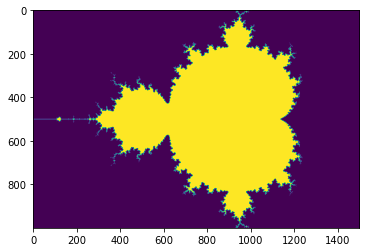

In [ ]:
from matplotlib.pylab import imshow, ion
import numpy as np
from time import time
from numba import jit

@jit
def mandel (x,y,max_iters):
    i=0
    c=complex(x,y)
    z=0.0j
    """Genera un sucesión recursiva de números complejos y devuelve un código de color distinto 
    si tiene una distancia al origen mayor de 2"""
    for i in range(max_iters):
        z=z*z+c
        if (z.real*z.real+z.imag*z.imag)>=4:
            return 1
    return 255
    
@jit
def create_fractal(min_x,max_x,min_y,max_y,image,iters):
    """ancho y alto para definir la escala"""
    height=image.shape[0]
    width=image.shape[1]
    
    pixel_size_x=(max_x-min_x)/width
    pixel_size_y=(max_y-min_y)/height
    
    """Se rellena la matriz de números enteros con los valores obtenidos al innvocar a la función mandel"""
    for x in range(width):
        real=min_x+x*pixel_size_x
        for  y in range(height):
            imag=min_y+y*pixel_size_y
            color=mandel(real,imag, iters)
            image[y,x]=color
            
    return image

image=np.zeros((500*2,750*2),dtype=np.uint8)
inicio=time()
img=create_fractal(-2.0,1.0,-1.0,1.0,image,20)
print(time()-inicio)
%timeit img=create_fractal(-2.0,1.0,-1.0,1.0,image,20)
imshow(img)
